<a href="https://colab.research.google.com/github/YeojinKim03/AI-study/blob/master/220803_AI_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#다양한 입출력


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

##2개의 입력, 1개의 출력
<br>
x1 + x2 -> y의 함수를 학습
<br>
x1과 x2는 0~1의 범위를 갖는다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 17.67148208618164
2/2 [==============================] - 0s 14ms/step - loss: 8.2181e-04 - mae: 0.0235
loss= 0.0008218055590987206
mae= 0.02349236235022545


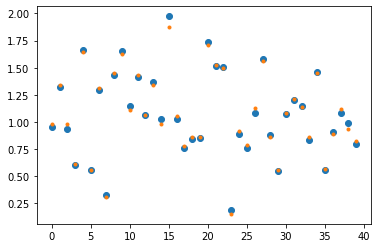

In [4]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)
y = np.sum(x, axis=1) #axis=1이 되는 이유는 2를 없애기 때문


#sum은 차원을 줄임
#(4,3)에서 (4, ) 이 되려면 3을 삭제해야, 그러면 axis=1
#(4,3)에서 ( ,3 ) 이 되려면 4를 삭제해야, 그러면 axis=0
#(5,2,3)에서 --> (2,3) 되려면 axis=0이 됨
#(5,2,3)에서 --> (5,3) 되려면 axis=1이 됨
#(5,2,3)에서 --> (5,2) 되려면 axis=2가 됨
#일반화 (1000,5,6,4) -->를 (1000,5,4)로 만들고 싶음, 그러면 axis=2로 주면 됨
#np.argmax() : 가장 큰 데이터의 위치를 줌 
 # ex) (100, 3) 을 argmax하면 (100, )이렇게 되는데 이게 axis=1주면 됨

s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


model = keras.Sequential()
# model.add(Input(1))
model.add(Input(2)) #첫번째 노드 수 = 입력받는 데이터의 특징 개수
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=32)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y, 'o')
plt.plot(y_, '.')
plt.show()

##1개의 입력, 2개의 출력
다음과 같이 y는 2개의 값을 갖고, y1 = x*2, y2=x/2인 함수를 학습

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 2)                 22        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.520876169204712
2/2 [==============================] - 0s 10ms/step - loss: 4.0854e-04 - mae: 0.0141
loss= 0.0004085370746906847
mae= 0.01410636305809021


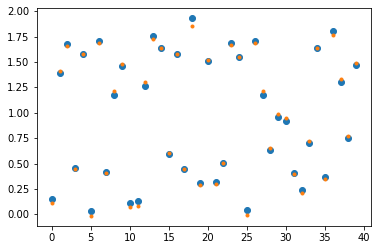

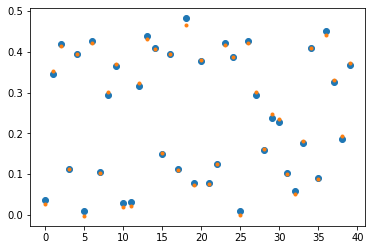

In [15]:
x = np.random.rand(100)
y = np.zeros((100,2))
y[:,0] = x*2.0
y[:,1] = x/2.0

s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
#model.add(Dense(1)) #2개의 결과를 보고 싶은 경우에 2개의 노드가 출력층에 필요하다 
#숫자구분의 경우 0~9까지 서로 다른 출력층으로 나오는 경우를 생각해보면 쉬움
model.add(Dense(2)) 

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], '.')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], '.')
plt.show()


#IRIS 데이터 분류

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [44]:
!wget https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/iris.csv

#리눅스 커맨드한테 넘겨주려면 !wget 이렇게 앞에 느낌표 붙임
#url은 선생님 깃허브에서 raw 누르고 주소복사한 것 

--2022-08-03 05:29:03--  https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2720 (2.7K) [text/plain]
Saving to: ‘iris.csv.2’

iris.csv.2          100%[===================>]   2.66K  --.-KB/s    in 0s      

2022-08-03 05:29:03 (40.4 MB/s) - ‘iris.csv.2’ saved [2720/2720]



In [45]:
!ls -al #전체 리스트 보여주기, 파일이 있는지 보겠다
!head iris.csv #iris.csv의 위 10개 항목 보여주기, comma separtaed value 파일

total 18568
drwxr-xr-x 1 root root      4096 Aug  3 05:29 .
drwxr-xr-x 1 root root      4096 Aug  3 01:48 ..
drwxr-xr-x 4 root root      4096 Aug  3 02:21 2022_WISET
drwxr-xr-x 4 root root      4096 Jul 28 13:39 .config
drwxr-xr-x 3 root root      4096 Aug  3 02:38 data
drwxr-xr-x 2  501 staff    36864 Jul 20  2020 Fire
-rw-r--r-- 1 root root  12888805 Aug  3 02:05 Fire.tar.gz
-rw-r--r-- 1 root root      2720 Aug  3 02:12 iris.csv
-rw-r--r-- 1 root root      2720 Aug  3 05:04 iris.csv.1
-rw-r--r-- 1 root root      2720 Aug  3 05:29 iris.csv.2
-rw-r--r-- 1 root root   5997816 Aug  3 01:56 Raccoon.zip
drwxr-xr-x 1 root root      4096 Jul 28 13:40 sample_data
drwxr-xr-x 2 root root      4096 Jun  8  2021 test
drwxr-xr-x 2 root root     32768 Jan  6  2022 train
drwxr-xr-x 2 root root      4096 Jun  8  2021 valid
septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,0,0,1
5.0,2.3,3.3,1.0,0,1,0
4.9,2.5,4.5,1.7,0,0,1
4.9,3.1,1.5,0.1,1,0,0
5.7,3.8,1.7,

In [46]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [47]:
iris.info() #non-null count : 비어있지 않은 것의 카운트

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   setosa         120 non-null    int64  
 5   versicolor     120 non-null    int64  
 6   virginica      120 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 6.7 KB


In [48]:
data = iris.to_numpy()
print(data.shape) #(120,7) 1개의 데이터는 7개의 항목 있음, 120개의 데이터
print(data[:5])

(120, 7)
[[6.4 2.8 5.6 2.2 0.  0.  1. ]
 [5.  2.3 3.3 1.  0.  1.  0. ]
 [4.9 2.5 4.5 1.7 0.  0.  1. ]
 [4.9 3.1 1.5 0.1 1.  0.  0. ]
 [5.7 3.8 1.7 0.3 1.  0.  0. ]]


In [49]:
x = data[:,:4] #x는 전체 행의 0~3까지의 열
y = data[:,4:] #y는 전체 행의 4부터 나머지 열

split_index = 100 

train_x, test_x = x[:split_index], x[split_index:] #100개까지는 트레이닝, 20개는 테스트
train_y, test_y = y[:split_index], y[split_index:]

In [50]:
model = keras.Sequential() #빈껍데기 모델
model.add(Input(4)) #인풋레이어 노드 4개 (x의 feature 4개니까)
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax')) #출력레이어 노드 3개, 3개의 종류 출력하기 위해
#분류문제일 경우에만 맨 마지막 층의 activation function으로 softmax를 넣음, 제일 큰 것을 확신할 수 있도록

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#categorical_crossentropy : 분류문제여서 누가 가장 높은 가능성인지가 중요하니까 
#metrics : 모델이 얼마나 잘하는지 성능을 수치로 나타낸 것
#metric='accuracy'은 분류문제에만 적용, 몇개가 정확히 맞췄는지 알려고 필요함
#accuracy는 keras가 대신 계산해 줌

In [52]:
model.fit(train_x, train_y, epochs=200, verbose=1)
#명시 안하면 batch_size는 디폴트로 32로 됨

Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 1.6391 - accuracy: 0.2900
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 1.5360 - accuracy: 0.2900
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 1.4324 - accuracy: 0.2900
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.3438 - accuracy: 0.2900
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 1.2617 - accuracy: 0.2900
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1821 - accuracy: 0.2900
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 1.1097 - accuracy: 0.2900
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0512 - accuracy: 0.2900
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9989 - accuracy: 0.2900
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9528 - accuracy: 0.2900
Epoch 11/200
4/4 [===========

In [53]:
loss, acc = model.evaluate(test_x, test_y) #성능측정

print("loss :", loss)
print("acc :", acc) #정확도 1.0 = 100%


1/1 [==============================] - 0s 156ms/step - loss: 0.0696 - accuracy: 1.0000
loss : 0.06958121061325073
acc : 1.0


In [54]:
y_ = model.predict(test_x) #예측
print(y_)
print(np.argmax(y_, axis=1)) #한줄당 가장 큰 넘버가 위치한 곳의 index를 반환

[[9.8282844e-01 1.6961318e-02 2.1017033e-04]
 [5.1763110e-02 9.1846198e-01 2.9774971e-02]
 [9.7982740e-01 1.9901104e-02 2.7144846e-04]
 [4.4036765e-02 9.2232800e-01 3.3635266e-02]
 [9.7032142e-01 2.9375110e-02 3.0355543e-04]
 [9.8416466e-01 1.5646160e-02 1.8920330e-04]
 [9.8262423e-01 1.7179865e-02 1.9581776e-04]
 [9.8144031e-01 1.8355243e-02 2.0433738e-04]
 [4.4050958e-02 9.3478757e-01 2.1161435e-02]
 [9.7681969e-01 2.2920849e-02 2.5945684e-04]
 [2.2960426e-03 2.5657189e-01 7.4113208e-01]
 [2.4112543e-02 9.1256076e-01 6.3326649e-02]
 [9.8050725e-01 1.9258324e-02 2.3448578e-04]
 [1.4543680e-04 2.8208802e-02 9.7164571e-01]
 [9.5353502e-01 4.6028242e-02 4.3667608e-04]
 [1.2853136e-02 7.2386831e-01 2.6327854e-01]
 [2.9647224e-02 9.2751765e-01 4.2835046e-02]
 [9.7621268e-01 2.3520140e-02 2.6720497e-04]
 [9.8370868e-01 1.6090121e-02 2.0120505e-04]
 [5.0626606e-02 9.1504806e-01 3.4325309e-02]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


#loss categorical_crossentropy
2가지 crossentropy 사용 방법


1.   categorical_crossentropy
2.   sparse_categorical_crossentropy




##1. categorical_crossentropy
y의 값이 one hot encoding인 경우 (정답에만 1 코딩)

In [ ]:
1,0,0
0,1,0
0,0,1

출력 레이어 설정

In [ ]:
model.add(Dense(3, activation="softmax")) # 출력 레이어에 softmax 필수

loss 설정

In [63]:
model.compile(..., loss='categorical_crossentropy')

ValueError: ignored

##2. Sparse_categorical_crossentropy
y의 값이 one hot encoding인 경우

In [ ]:
0
1
2

출력 레이어 설정

In [ ]:
model.add(Dense(3, activation="softmax")) # 출력 레이어. 1이 아니라 클래스 수 3

loss 설정

In [ ]:
model.compile(..., loss='sparse_categorical_crossentropy')

아이리스 데이터 다운로드 - sparse_categorical_crossentropy 사용 실습

In [55]:
!wget https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/iris_with_category_index.csv

--2022-08-03 05:41:39--  https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/iris_with_category_index.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2218 (2.2K) [text/plain]
Saving to: ‘iris_with_category_index.csv’

iris_with_category_ 100%[===================>]   2.17K  --.-KB/s    in 0s      

2022-08-03 05:41:39 (26.2 MB/s) - ‘iris_with_category_index.csv’ saved [2218/2218]



In [56]:
!ls -al
!head iris_with_category_index.csv

total 18572
drwxr-xr-x 1 root root      4096 Aug  3 05:41 .
drwxr-xr-x 1 root root      4096 Aug  3 01:48 ..
drwxr-xr-x 4 root root      4096 Aug  3 02:21 2022_WISET
drwxr-xr-x 4 root root      4096 Jul 28 13:39 .config
drwxr-xr-x 3 root root      4096 Aug  3 02:38 data
drwxr-xr-x 2  501 staff    36864 Jul 20  2020 Fire
-rw-r--r-- 1 root root  12888805 Aug  3 02:05 Fire.tar.gz
-rw-r--r-- 1 root root      2720 Aug  3 02:12 iris.csv
-rw-r--r-- 1 root root      2720 Aug  3 05:04 iris.csv.1
-rw-r--r-- 1 root root      2720 Aug  3 05:29 iris.csv.2
-rw-r--r-- 1 root root      2218 Aug  3 05:41 iris_with_category_index.csv
-rw-r--r-- 1 root root   5997816 Aug  3 01:56 Raccoon.zip
drwxr-xr-x 1 root root      4096 Jul 28 13:40 sample_data
drwxr-xr-x 2 root root      4096 Jun  8  2021 test
drwxr-xr-x 2 root root     32768 Jan  6  2022 train
drwxr-xr-x 2 root root      4096 Jun  8  2021 valid
septal_length,septal_width,petal_length,petal_width,class
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5

In [57]:
iris = pd.read_csv("iris_with_category_index.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [58]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [59]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 1)
(20, 4)
(20, 1)


In [61]:
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax')) # 1이 아니고 클래스 수 3이다
#출력값은 1개(숫자) 일테지만 keras가 3개로 카테고리를 나눠줄거니까 클래스 수인 3개로 출력층 노드 구성

# model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

#loss에 sparse_categorical_crossentropy사용 : 분류문제인데 y값이 카테고리로 되어있음, keras보고 one hot encoding 해달라고 하는 것


model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
              


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                50        
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
5/5 [==============================] - 0s 3ms/step - loss: 1.3499 - accuracy: 0.3600
Epoch 2/1000
5/5 [==============================] - 0s 4ms/step - loss: 1.2491 - accuracy: 0.3600
Epoch 3/1000
5/5 [==============================] - 0s 5ms/step - loss: 1.1742 - accuracy: 0.3600
Epoch 4/1000
5/5 [========

In [62]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.9283892e-01 6.9854069e-03 1.7578402e-04]
 [8.4606782e-03 9.8857969e-01 2.9596358e-03]
 [9.8064137e-01 1.9036343e-02 3.2228377e-04]
 [3.0882212e-03 9.9379081e-01 3.1209372e-03]
 [9.9431992e-01 5.5190967e-03 1.6090962e-04]
 [9.9485093e-01 4.9997824e-03 1.4931090e-04]
 [9.9547428e-01 4.3844539e-03 1.4127535e-04]
 [9.9563026e-01 4.2317873e-03 1.3794327e-04]
 [1.5987359e-02 9.8126858e-01 2.7439992e-03]
 [9.9217272e-01 7.6441993e-03 1.8308744e-04]
 [8.1838691e-04 3.6211380e-01 6.3706785e-01]
 [3.2641790e-03 9.8974252e-01 6.9932737e-03]
 [9.9050796e-01 9.2867427e-03 2.0531885e-04]
 [2.4271480e-04 5.8942724e-02 9.4081450e-01]
 [9.9483716e-01 5.0055999e-03 1.5724156e-04]
 [1.7632406e-03 9.2248011e-01 7.5756647e-02]
 [4.2226757e-03 9.9076909e-01 5.0082714e-03]
 [9.9273407e-01 7.0920712e-03 1.7382496e-04]
 [9.9291915e-01 6.9100307e-03 1.7079148e-04]
 [3.5204298e-03 9.9363893e-01 2.8405909e-03]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


#DNA regression, boston 집값 예측

##문제 
1. 데이터들을 normalization
    각 feature별로
    출력값 
2. DNN. 2->1......  13->1
3. metric. 'mape'

요구사항
  - train_loss, val_loss 그래프 그리기
  - test데이터에 대한 mape 출력

  - 오버피팅 완화해서 성능 개선해 보기

##importing

In [16]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Input

import time

##data loading

In [17]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.boston_housing.load_data()

In [18]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)
      

(404, 13)
(404,)
(102, 13)
(102,)


In [19]:
print(raw_train_x[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [20]:
print(raw_train_y[:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


##데이터 살펴보기

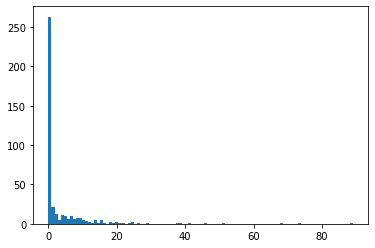

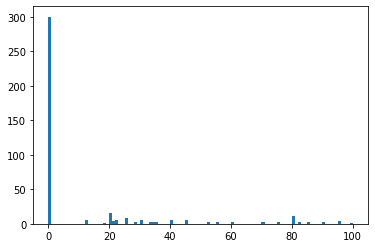

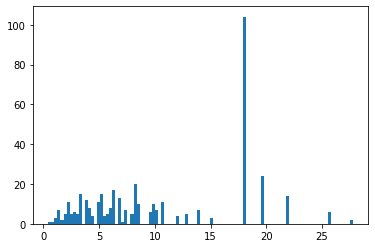

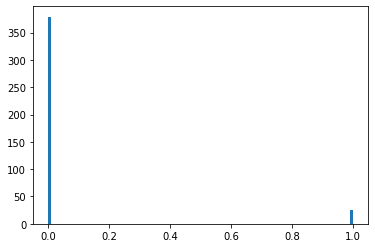

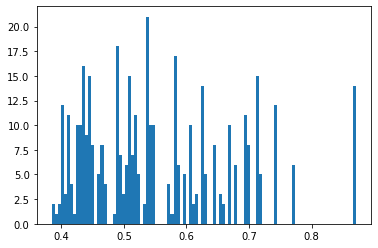

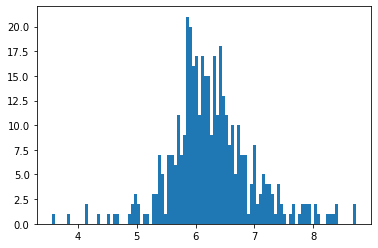

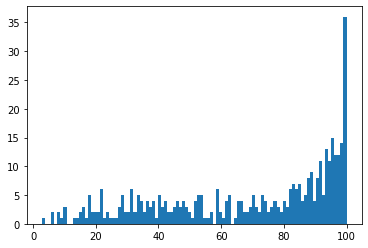

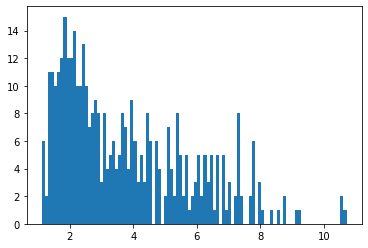

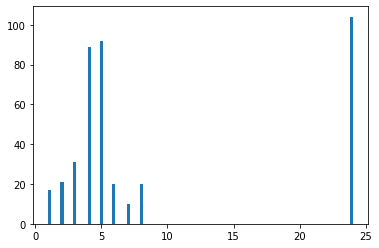

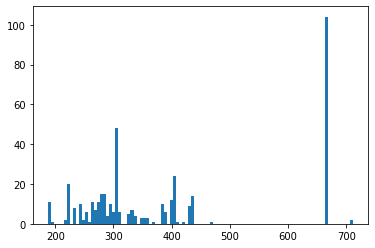

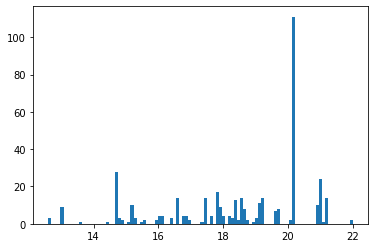

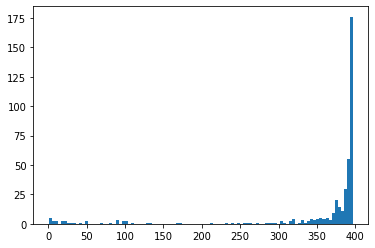

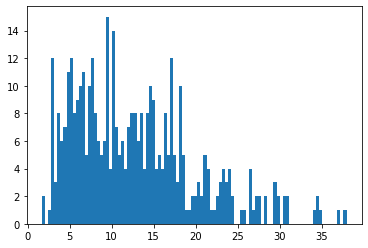

In [21]:
for i in range(13):
  plt.hist(raw_train_x[:,i], bins=100)
  plt.show()

##normalization

In [22]:
train_x = raw_train_x
train_y = raw_train_y
test_x = raw_test_x
test_y = raw_test_y

In [23]:
#x값 normalization 

for i in range(13):
  target = raw_train_x[:,i]
  min = np.min(target) #min 구함
  max = np.max(target) #max 구함
  print(min, max)
  train_x[:,i] = (target-min)/(max-min) #0과 1사의 값으로 만듦
  print(np.min(train_x[:,i]), np.max(train_x[:,i]))  

for i in range(13):
  target = raw_test_x[:,i]
  min = np.min(target)
  max = np.max(target)
  print(min, max)
  test_x[:,i] = (target-min)/(max-min)
  print(np.min(test_x[:,i]), np.max(test_x[:,i]))  

0.00632 88.9762
0.0 1.0
0.0 100.0
0.0 1.0
0.46 27.74
0.0 1.0
0.0 1.0
0.0 1.0
0.385 0.871
0.0 1.0
3.561 8.725
0.0 1.0
2.9 100.0
0.0 1.0
1.1296 10.7103
0.0 1.0
1.0 24.0
0.0 1.0
188.0 711.0
0.0 1.0
12.6 22.0
0.0 1.0
0.32 396.9
0.0 1.0
1.73 37.97
0.0 1.0
0.01311 25.0461
0.0 1.0
0.0 90.0
0.0 1.0
1.22 27.74
0.0 1.0
0.0 1.0
0.0 1.0
0.392 0.871
0.0 1.0
4.88 8.78
0.0 1.0
6.0 100.0
0.0 1.0
1.4655 12.1265
0.0 1.0
1.0 24.0
0.0 1.0
187.0 711.0
0.0 1.0
13.0 21.2
0.0 1.0
24.65 396.9
0.0 1.0
1.92 31.99
0.0 1.0


In [24]:
#y값 normalization

target = raw_train_y
min = np.min(target)
max = np.max(target)
print(min, max)
train_y = (target-min)/(max-min)
print(np.min(train_y), np.max(train_y))  

target = raw_test_y
min = np.min(target)
max = np.max(target)
print(min, max)
test_y = (target-min)/(max-min)
print(np.min(test_y), np.max(test_y))  

5.0 50.0
0.0 1.0
5.6 50.0
0.0 1.0


##모델 정의

In [25]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],))) #인풋 10개노드, feature의 개수
#model.add(Input(13))과 같은 의미가 input_shape=(train-x.shape[1],)와 같음
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) #출력 노드는 1개

model.compile(optimizer="Adam", loss="mse", metrics=["mae"]) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                140       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


##학습 실행

In [27]:
start = time.time()
history = model.fit(train_x, train_y, epochs=5000, verbose=1, batch_size=64, validation_split=0.1)
print("elapsed :", (time.time() - start))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6/6 [==============================] - 0s 13ms/step - loss: 0.0016 - mae: 0.0287 - val_loss: 0.0030 - val_mae: 0.0435
Epoch 2502/5000
6/6 [==============================] - 0s 11ms/step - loss: 0.0016 - mae: 0.0289 - val_loss: 0.0028 - val_mae: 0.0423
Epoch 2503/5000
6/6 [==============================] - 0s 11ms/step - loss: 0.0016 - mae: 0.0288 - val_loss: 0.0028 - val_mae: 0.0430
Epoch 2504/5000
6/6 [==============================] - 0s 10ms/step - loss: 0.0016 - mae: 0.0285 - val_loss: 0.0029 - val_mae: 0.0433
Epoch 2505/5000
6/6 [==============================] - 0s 13ms/step - loss: 0.0016 - mae: 0.0288 - val_loss: 0.0028 - val_mae: 0.0433
Epoch 2506/5000
6/6 [==============================] - 0s 14ms/step - loss: 0.0016 - mae: 0.0285 - val_loss: 0.0029 - val_mae: 0.0433
Epoch 2507/5000
6/6 [==============================] - 0s 14ms/step - loss: 0.0016 - mae: 0.0289 - val_loss: 0.0028 - val_mae: 0.0429
Epoch 2508/5000
6/6 [=====================

In [30]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)


4/4 [==============================] - 0s 6ms/step - loss: 0.0189 - mae: 0.1087
loss= 0.018899155780673027
mape= 0.10867655277252197


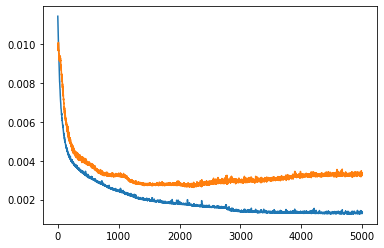

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

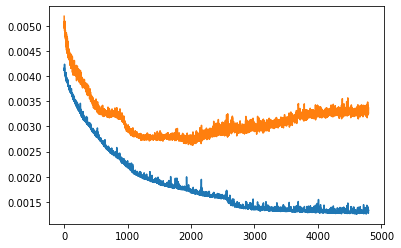

In [32]:
plt.plot(history.history['loss'][200:])
plt.plot(history.history['val_loss'][200:])
plt.show()

In [33]:
start = time.time()
history = model.fit(train_x, train_y, epochs=5000, verbose=0, batch_size=64, validation_split=0.1)
print("elapsed :", (time.time() - start))

elapsed : 216.5929892063141


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

In [ ]:
y_ = model.predict(test_x)

for i in range(50):
  print(test_y[i], y_[i])

In [ ]:
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y)
plt.scatter(test_x.T[0],y_, color="r")
plt.show()

In [ ]:
plt.scatter(test_y, y_)
plt.show()